앞의 강의에서 만든 코드에서 라벨 변환이 잘 되었는지 확인해보겠습니다. 

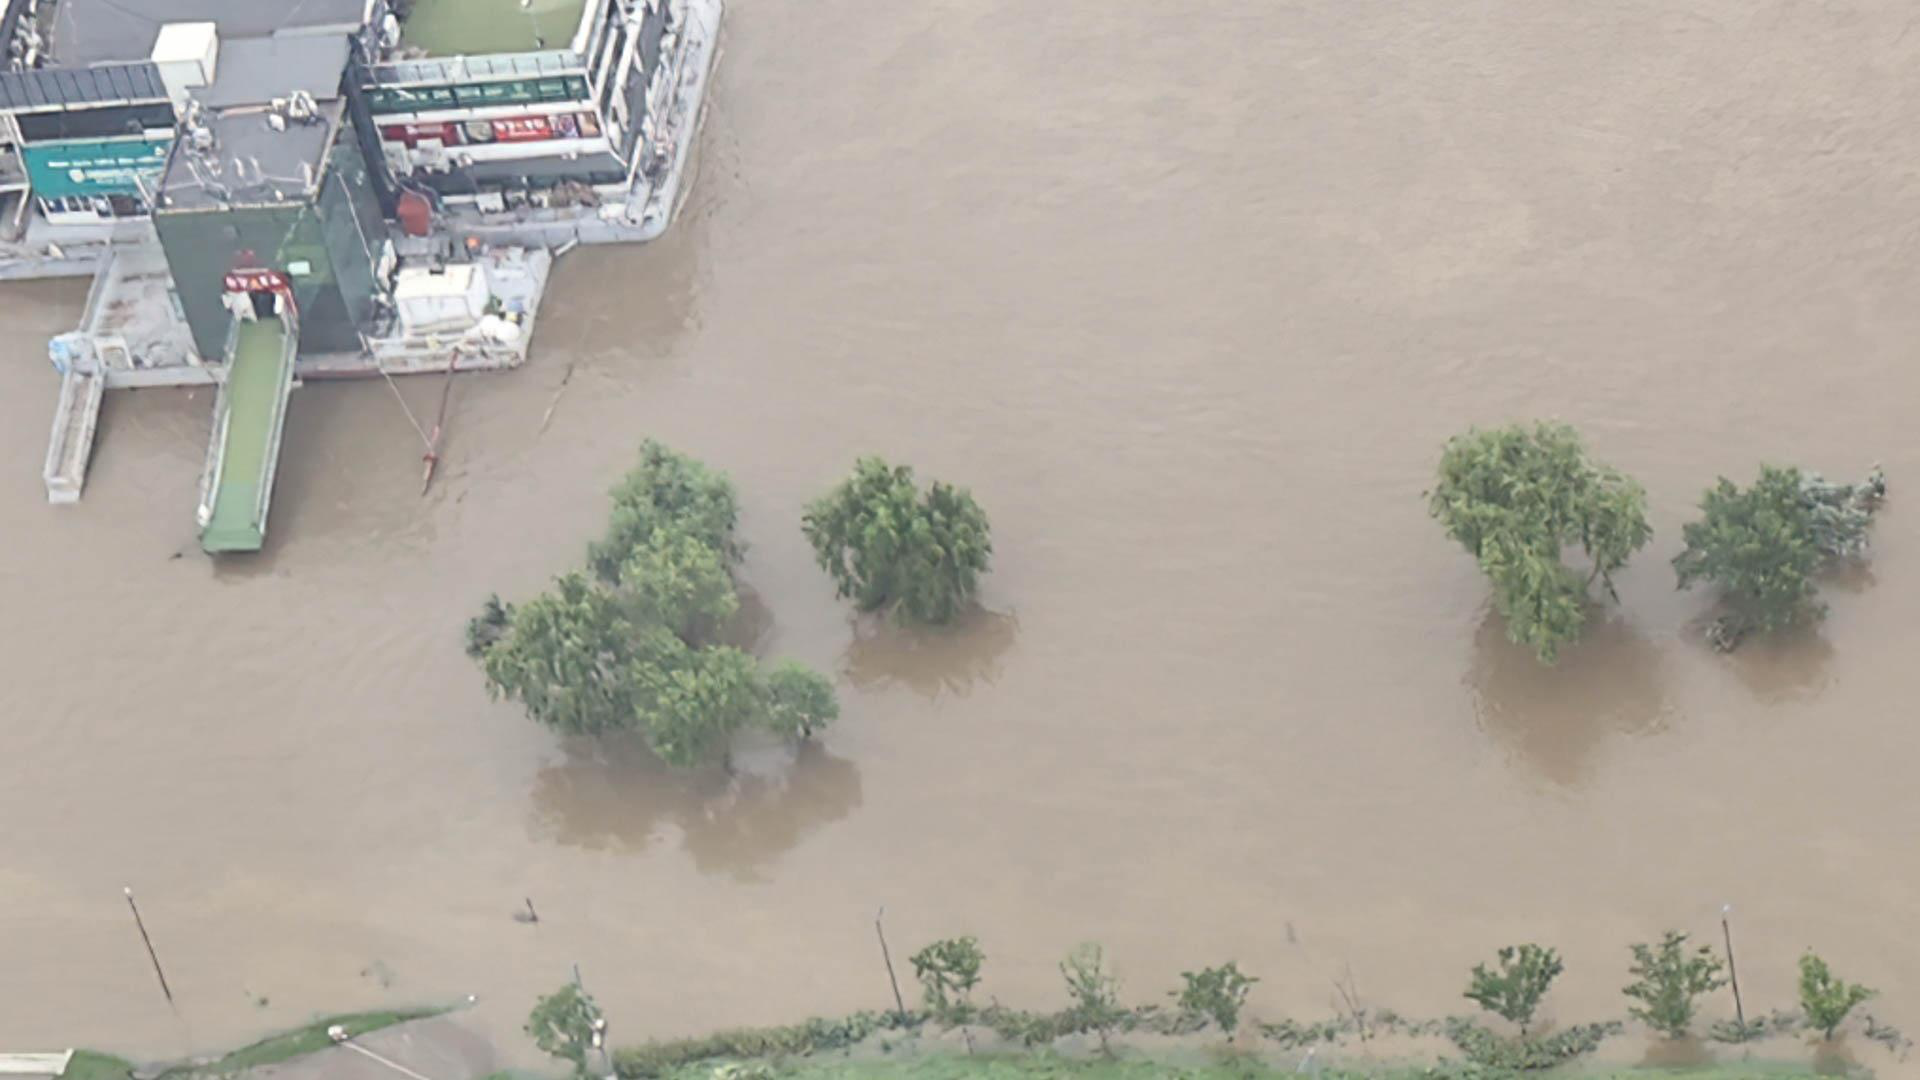

In [17]:
# 이미지 확인

from PIL import Image

file_image = "/content/drive/MyDrive/Teaching/DL 202301/홍수/원천데이터/TS/03/03/11/03_03_11_6000478.jpg"
image = Image.open(file_image)
image.show()

변환하여 저장한 라벨을 불러와보겠습니다. 

In [3]:
file_label = '/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/03_03_11_6000478.txt'
with open(file_label, "r") as f:
    lines = f.readlines()

In [20]:
from PIL import ImageDraw, Image

# 이미지 불러오기, 투명도 적용을 위해 RGBA 형태로 변환
image = Image.open(file_image)
draw = ImageDraw.Draw(image, 'RGBA')  

# 이미지 사이즈 가져오기
width, height = image.size

for line in lines:
  parts = line.strip().split()  # 공백 제거 및 리스트 변환
  y = str(parts[0]) # class_id
  points = parts[1:] # 폴리곤
  #print(points)

  # 포인트를 str--> float 변환 및 width, height 곱해서 원래 크기로
  polygon = [(int(float(points[i])*width), int(float(points[i+1])*height)) for i in range(0, len(points), 2)]

  draw.polygon(polygon, fill=(255, 0, 0, 200), outline=(0, 0, 0) ) # R,G,B,A 투명도 0~255

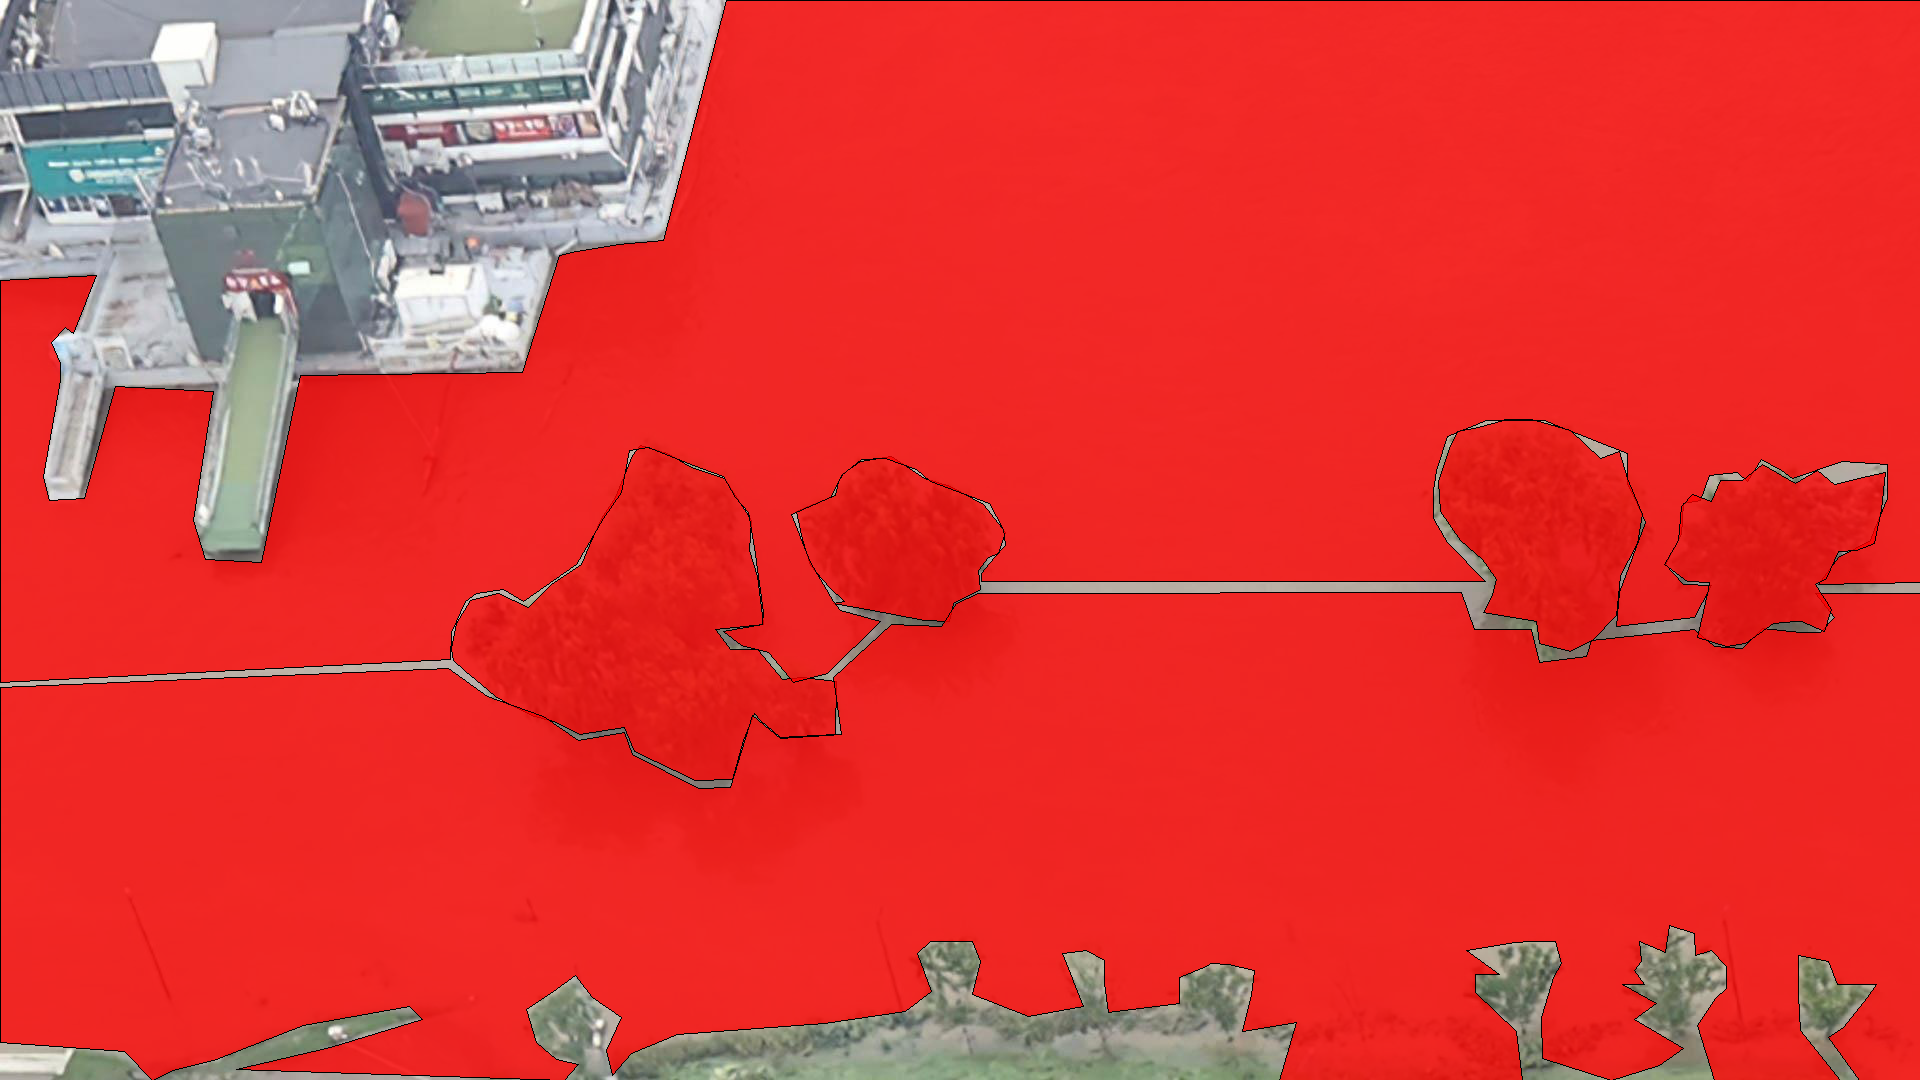

In [21]:
image.show()

클래스 id 정보를 확인해봅시다. 

In [1]:


# 클래스id 만 가져옵시다. 

def get_class_id(file):
  with open(file, "r") as file:
      lines = file.readlines()

      class_id = set()  # set을 이용하면 집합연산이어서 같은 요소는 1번만 저장됩니다. 
      for line in lines:
        parts = line.strip().split()  # 공백 제거 및 리스트 변환
        class_id.add(parts[0])  # 클래스 id 추가
  return class_id

함수가 잘 작동하는지 확인해봅시다. 

In [4]:
get_class_id(file_label)

{'30311', '30319'}

이제 전체 폴더에 대해서 클래스id를 수집합시다 .

In [7]:
import os
folder_path = '/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo'

class_ids = set()
for item_name in os.listdir(folder_path):
    file = os.path.join(folder_path, item_name)
    print(file)
    if os.path.isfile(file):  # 파일인 경우에만 출력
        class_ids.update(get_class_id(file)) # set끼리 합칠때에는 update 함수 사용

/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/03_03_11_6000478.txt
/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/03_03_11_6000410.txt
/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/03_03_11_6000281.txt
/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/03_03_11_6000287.txt
/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/03_03_11_6000886.txt
/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/03_03_11_6000088.txt
/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/03_03_11_6000108.txt
/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/03_03_11_6000573.txt
/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/03_03_11_6000519.txt
/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/03_03_11_6001056.txt
/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/03_03_11_6000749.txt
/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/03_03_11_6001075.txt
/content/drive/MyDrive/Teaching/DL 20230

In [8]:
class_ids

{'30308', '30311', '30319', '30320'}

yolo에서 클래스id는 0번 부터 부여되어야 합니다. 

위의 기준으로 class id를 변경해보겠습니다. 

In [9]:
class_names = list(class_ids)

In [10]:
class_names  # 리스트로 변환, 이 순서로 class id 변경

['30320', '30319', '30311', '30308']

In [11]:
import os

def change_id(file):

  # 파일을 열어서 id 부분만 변경하여 저장
  new_lines = []
  with open(file, "r") as f:
    lines = f.readlines()
    for line in lines:
      parts = line.strip().split()  # 공백 제거 및 리스트 변환
      parts[0] = class_names.index(parts[0])  # 클래스 id 수정
      new_line = ' '.join(str(elem) for elem in parts)
      new_lines.append(new_line)

  # 동일한 이름의 파일로 저장
  with open(file, "w") as f:
    for line in new_lines:
      f.write(line + '\n')

    



전체 폴더에 적용합시다

In [12]:
import os
folder_path = '/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo'

for file_name in os.listdir(folder_path):
  file = os.path.join(folder_path, file_name)
  try:
    change_id(file) 
  except:
    print(file)


/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/.ipynb_checkpoints


이제 data 정보를 담은 yaml 파일을 만들어봅시다. 

coco128_seg.yaml 파일을 참고해서 만들겠습니다 .

```


# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/drive/MyDrive/Teaching/DL 202301/홍수  # dataset root dir
train: images/train  # train images (relative to 'path') 128 images
val: images/val  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes
names:  ['30308', '30311', '30319', '30320'] # id, name으로 작성하면 됨, 여기서는 이름 찾지 않아서 그냥 id를 넣었습니다. 

  
  
```

yolov8 seg 모델 불러와서 훈련해봅시다. 

In [13]:
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
%pip install -e .

fatal: destination path 'ultralytics' already exists and is not an empty directory.
/content/ultralytics
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.109
    Uninstalling ultralytics-8.0.109:
      Successfully uninstalled ultralytics-8.0.109
  Running setup.py develop for ultralytics


파일을 경로에 맞게 복사해보겠습니다. 

In [14]:
import os
import shutil

def copy_files(source_folder, destination_folder, n_start,n_end):
  ''' 파일을 정렬하여 필요한 개수만 복사하는 함수
    n_start에서, n_end번째 파일 복사
  '''
  # 원본 폴더 내의 파일 목록을 읽어옴
  file_list = os.listdir(source_folder)

  # 파일 이름을 기준으로 정렬
  sorted_file_list = sorted(file_list)

  # 상위 n개 파일만 선택하여 복사
  for filename in sorted_file_list[n_start:n_end]:
      source_file = os.path.join(source_folder, filename)
      destination_file = os.path.join(destination_folder, filename)
      shutil.copy(source_file, destination_file)

  print("파일 복사 완료")

In [15]:
# 원천데이터 이미지 일부 images 폴더로 복사
copy_files('/content/drive/MyDrive/Teaching/DL 202301/홍수/원천데이터/TS/03/03/11',
           '/content/drive/MyDrive/Teaching/DL 202301/홍수/images/train',
           0,20)  # 20개 이미지 복사

파일 복사 완료


In [16]:
# 원천데이터 이미지 일부 images 폴더로 복사
copy_files('/content/drive/MyDrive/Teaching/DL 202301/홍수/원천데이터/TS/03/03/11',
           '/content/drive/MyDrive/Teaching/DL 202301/홍수/images/val',
           20,30)  # 10개,val 폴도로 이미지 복사

파일 복사 완료


In [20]:
# 라벨링 파일 복사
copy_files('/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo',
           '/content/drive/MyDrive/Teaching/DL 202301/홍수/labels/train',
           0,20)  # 20개 라벨 복사

파일 복사 완료


In [21]:
# 라벨링 파일 복사
copy_files('/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo',
           '/content/drive/MyDrive/Teaching/DL 202301/홍수/labels/val',
           20,30)  # 20개 라벨 복사

파일 복사 완료


이제 훈련을 시작해보겠습니다 .

In [26]:
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')
model.train(data='/content/drive/MyDrive/Teaching/DL 202301/flood_data.yaml', epochs=100)

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/Teaching/DL 202301/flood_data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify

In [27]:
results = model('/content/drive/MyDrive/Teaching/DL 202301/홍수/images/train/03_03_11_6000003.jpg')
from google.colab.patches import cv2_imshow
res_plotted = results[0].plot()
cv2_imshow(res_plotted)

Output hidden; open in https://colab.research.google.com to view.